In [24]:
import pandas as pd
import matplotlib.pyplot as plt
movies = pd.read_csv('/Users/leahschell/Documents/Flatiron/phase_1/microsoft/Microsoft-Pitch/Main Database/all_genres_vs_budgets.csv')
movies.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]"
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]"


# ACTION/ADVENTURE

https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee

## Sort for Genre ID

Action          28

Adventure       12


### What genres are assigned to highest grossing movies from budgets csv?

Below I'm triple checking that highest grossing movies are mostly action/adventure based on prior ip

In [5]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              441 non-null    object
 1   production_budget  441 non-null    int64 
 2   worldwide_gross    441 non-null    int64 
 3   release_month      441 non-null    int64 
 4   release_year_x     441 non-null    int64 
 5   genre_ids          441 non-null    object
dtypes: int64(4), object(2)
memory usage: 20.8+ KB


In [8]:
movies.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]"
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]"


In [6]:
movies.describe()

,production_budget,worldwide_gross,release_month,release_year_x
count,441.00000,441.00000,441.00000,441.00000
mean,49398539.68254,169579872.61678,6.64399,2016.92744
std,59081618.20189,274077468.01085,3.53974,0.85504
min,30000.00000,0.00000,1.00000,2016.00000
25%,10000000.00000,12874922.00000,3.00000,2016.00000
50%,27000000.00000,59596747.00000,7.00000,2017.00000
75%,60000000.00000,190453132.00000,10.00000,2018.00000
max,317000000.00000,2048134200.00000,12.00000,2019.00000


In [26]:
#scraping out action movies that did not have worldwide release
action = movies[(movies['worldwide_gross'] > 0)]
action

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]"
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]"
...,...,...,...,...,...,...
435,Higher Power,500000,528,5,2018,"[28, 878, 53]"
436,Sleight,250000,3934450,4,2017,"[18, 53, 28, 878]"
438,The Fits,170000,169242,6,2016,[18]
439,A Ghost Story,100000,2769782,7,2017,"[18, 14, 10749]"


In [27]:
action = action[(action['genre_ids'].str.contains("12")) | (action['genre_ids'].str.contains("28"))]
action.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]"
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]"


## Not for kids/family
I'm going to scrape out the ones that are also made for young kids in mind - like lego franchise because that will be explicitly covered by Russel


Animation       16

Family          10751

In [28]:
action = action[(~action["genre_ids"].str.contains('10751')) | (~action["genre_ids"].str.contains('16'))]
action.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]"
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]"


In [29]:
action.describe()

,production_budget,worldwide_gross,release_month,release_year_x
count,151.00000,151.00000,151.00000,151.00000
mean,87576490.06623,282158198.82119,5.98675,2016.98675
std,75179364.14734,356099813.97569,3.34462,0.87929
min,250000.00000,528.00000,1.00000,2016.00000
25%,30000000.00000,40348933.50000,3.00000,2016.00000
50%,60000000.00000,136617305.00000,6.00000,2017.00000
75%,147000000.00000,388660385.50000,8.00000,2018.00000
max,317000000.00000,2048134200.00000,12.00000,2019.00000


# WHAT ARE TOP EARNING ACTION MOVIES

In [52]:
action_highest_gross = action[(action['worldwide_gross'] >= 388660385)]
ahgsort = action_highest_gross.sort_values(by='worldwide_gross', ascending = False)
ahgsort1 = ahgsort.sort_values(by=['worldwide_gross'], ascending= False)
ahgsort1.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
9,Black Panther,200000000,1348258224,2,2018,"[28, 12, 14, 878]"
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
30,Jurassic World: Fallen Kingdom,170000000,1305772799,6,2018,"[28, 12, 878]"
6,The Fate of the Furious,250000000,1234846267,4,2017,"[28, 80, 53]"


# BUDGETS OF ACTION/ADVENTURE: SPEND MONEY AND MAKE A SPLASH

In [32]:
action.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]"
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]"


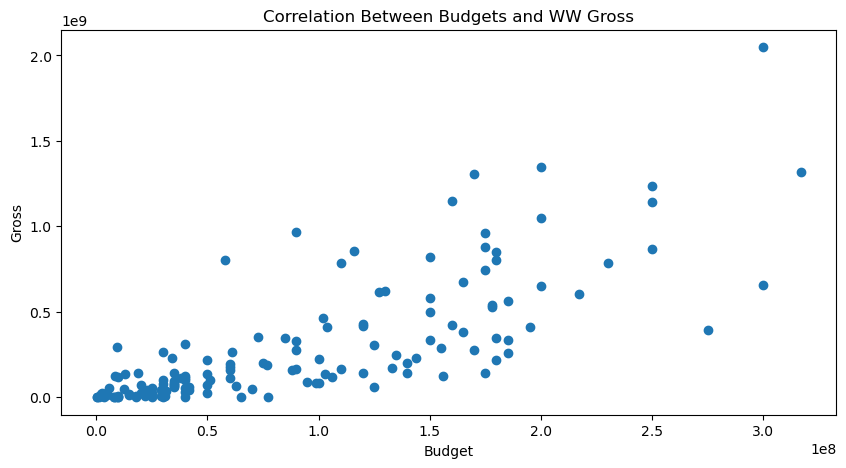

In [33]:
x = action['production_budget']
y = action['worldwide_gross']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
ax.set_title('Correlation Between Budgets and WW Gross')
ax.set_xlabel('Budget')
ax.set_ylabel('Gross');

Slight positive correlation between budget and ww gross - not predicted to be very profitable

# ACTION/ADVENTURE TIME OF YEAR RELEASE - DOES IT MATTER? 

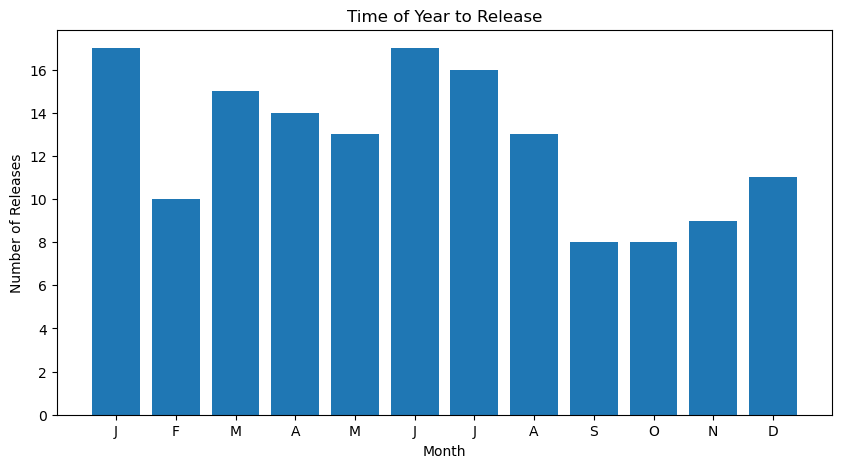

In [34]:
x = action['release_month'].value_counts().sort_index().index
y = action['release_month'].value_counts().sort_index().values
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Time of Year to Release')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Releases')
ax.set_xticks(range(1,13))
ax.set_xticklabels(list('JFMAMJJASOND'));

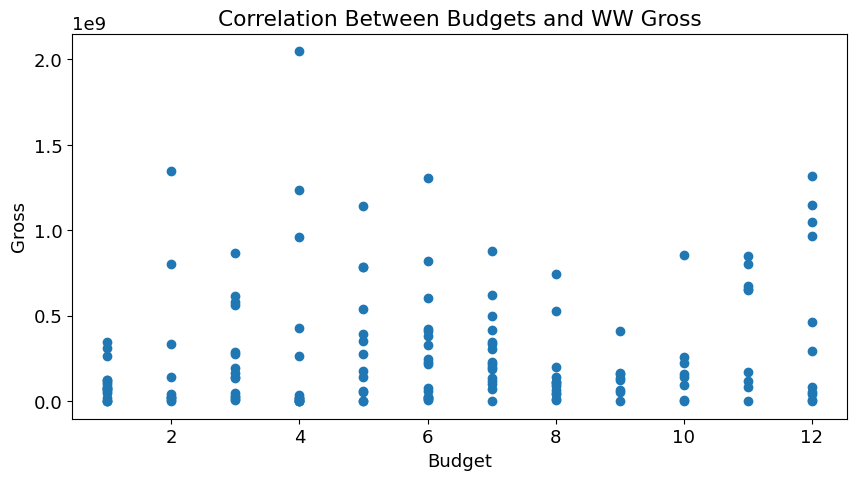

In [47]:
x = action['release_month']
y = action['worldwide_gross']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
ax.set_title('Correlation Between Budgets and WW Gross')
ax.set_xlabel('Budget')
ax.set_ylabel('Gross');